# 04: Automatic Blog Post Creator

> "Discover the power of Artificial Intelligence with OpenAI's powerful API to generate text and images in projects". Udemy course.

In [279]:
import os
import openai 

In [280]:
#os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.getenv("OPENAI_API_KEY")

## Git Automatic Update

In [281]:
from git import Repo
import git
from pathlib import Path

In [282]:
pwd

'/home/tommaselli/Documents/GPT-Projects/04-Post_Creator'

In [283]:
PATH_BLOG_REPO = Path('/home/tommaselli/Documents/GPT-Projects/.git')
PATH_BLOG = PATH_BLOG_REPO.parent 
PATH_CONTENT =PATH_BLOG/'content'

In [284]:
PATH_CONTENT.mkdir(exist_ok=True,parents=True)

In [285]:
def update_blog(commit_message='updates blog'):
    # GitPython -- Repo Locatio 
    repo = Repo(PATH_BLOG_REPO)
    # git add .
    repo.git.add(all=True)
    # git commit -m "updates blog"
    repo.index.commit(commit_message)
    origin = repo.remote(name='origin')
    origin.push()

update in github (working):

In [286]:
random_text = 'orkepofmkmwẽw'

In [287]:
#with open(PATH_BLOG/'index.html', 'w') as f:
#    f.write(random_text)

#update_blog()

## Insert HTML with GPT

In [288]:
import shutil

In [289]:
def create_new_blog(title, content, cover_image): 
    cover_image = Path(cover_image)

    files = len(list(PATH_CONTENT.glob('*.html')))
    new_title = f'{files+1}.html'
    path_new_content = PATH_CONTENT/new_title

    shutil.copy(cover_iamge, PATH_CONTENT)
    if not os.path.exists(path_new_content):
        # WRITE A NEW HTML FILE
        with open(path_new_content, 'w') as f:
            f.write('<!DOCTYPE html>\n')
def create_new_blog(title, content, cover_image): 
    cover_image = Path(cover_image)

    files = len(list(PATH_CONTENT.glob('*.html')))
    new_title = f'{files+1}.html'
    path_new_content = PATH_CONTENT/new_title

    shutil.copy(cover_image, PATH_CONTENT)
    if not os.path.exists(path_new_content):
        # WRITE A NEW HTML FILE
        with open(path_new_content, 'w') as f:
            f.write('<!DOCTYPE html>\n')
            f.write('<html>\n')
            f.write('<head>\n')
            f.write('<title>' + title + '</title>\n')
            f.write('</head>\n')
            f.write('<body>\n')
            f.write('<header>\n')
            f.write('<h1>' + title + '</h1>\n')
            f.write('</header>\n')
            f.write('<img src="' + cover_image.name + '">\n')
            ### GPT completion

            f.write(content.replace('\n', '<br>\n'))
            f.write('</body>\n')
            f.write('</html>\n')
            print('Blog created')
            return path_new_content
            
    else: 
        raise FileExistsError('File already exists')

In [290]:
#path_new_content = create_new_blog('Test Blog', 'This is a test blog', 'cover.png')

In [291]:
from bs4 import BeautifulSoup as Soup

In [292]:
with open(PATH_BLOG/'index.html') as index:
    soup = Soup(index.read())

In [293]:
str(soup)

'<html>\n<head>\n<title>\n   Page\n  </title>\n</head>\n<body>\n</body>\n</html>\n'

In [294]:
# checking duplicate links 
def check_duplicate(path_new_content, links):
    urls = [str(link.get('href')) for link in links] # 1.html, 2.html, 3.html...
    content_path = str(Path(*path_new_content.parts[-2:])) # (rel_path)/1.html, check if 1.html is in urls
    return content_path in urls

In [295]:
def write_index(path_new_content):
    with open(PATH_BLOG/'index.html') as index:
        soup = Soup(index.read())

    links = soup.find_all('a')
    try: 
        last_link = links[-1]
    except: 
        last_link = soup.new_tag('a')
        soup.append(last_link)

    if check_duplicate(path_new_content, links):
        raise ValueError('Duplicate link found')

    link_new_blog = soup.new_tag('a', href=Path(*path_new_content.parts[-2:]))
    link_new_blog.string = path_new_content.name.split('.')[0]
    last_link.insert_after(link_new_blog)

    with open(PATH_BLOG/'index.html', 'w') as index:
        index.write(str(soup.prettify(formatter='html')))

In [296]:
#write_index(path_new_content)
#update_blog('Added new blog')

# Add GPT

In [297]:
def create_prompt(title):
    prompt = ''' 
    Biography: My name is Felipe and I am a Python professional and instructor for coding.

    Blog
    Title: {}
    tags: tech, python, coding, AI machine learning
    Summarry: I talk about what the future of AI could hold for python developers
    Full text: 
    '''.format(title)
    return prompt 

In [298]:
title = 'The future of Python and AI'
prompt = create_prompt(title)
prompt

' \n    Biography: My name is Felipe and I am a Python professional and instructor for coding.\n\n    Blog\n    Title: The future of Python and AI\n    tags: tech, python, coding, AI machine learning\n    Summarry: I talk about what the future of AI could hold for python developers\n    Full text: \n    '

In [299]:
response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": prompt},
    ],
    temperature=0.75,
    max_tokens=1024,
)

In [300]:
blog_content = response.choices[0].message.content
blog_content

"As a Python professional and coding instructor, I am always looking towards the future of technology and how it will impact the programming world. One of the most exciting advancements in recent years has been the rise of artificial intelligence and machine learning. Python has become a popular language for AI development, thanks to its versatility and ease of use.\n\nIn this blog post, I want to explore what the future could hold for Python developers in the AI space. With the increasing demand for AI solutions in various industries, there is a growing need for skilled developers who can build and deploy these advanced systems. Python's rich ecosystem of libraries and frameworks, such as TensorFlow and PyTorch, make it an ideal choice for AI development.\n\nAs AI continues to evolve and become more integrated into our daily lives, Python developers will play a crucial role in shaping the technology of tomorrow. Whether it's developing self-driving cars, creating personalized recommen

In [301]:
def dalle2_prompt(title):
    prompt = f'pixel art showing {title}'
    return prompt 

In [302]:
image_prompt = dalle2_prompt(title)

In [303]:
response_img = openai.images.generate(
    model="dall-e-2",
    prompt=image_prompt,
    size="1024x1024",
    quality="standard",
    n=1,
)

In [304]:
img_url = response_img.data[0].url
img_url 

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-JgMgchvzVB0eRIG8oYeeZhpj/user-nXtavWkYPNEvu4bcyzyhE3iU/img-kRqQnFc7QwE2LcaZGWS4QvQc.png?st=2024-03-26T00%3A48%3A24Z&se=2024-03-26T02%3A48%3A24Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-03-25T21%3A12%3A40Z&ske=2024-03-26T21%3A12%3A40Z&sks=b&skv=2021-08-06&sig=HB1yHFVClLnh2HGrUN/GVNMtKXc1XShcWrdmTf9qVrw%3D'

In [305]:
import requests

In [312]:
def save_image(img_url, file_name):
    image_res = requests.get(img_url, stream=True)
    if image_res.status_code == 200: 
        with open(file_name, 'wb') as f:
            shutil.copyfileobj(image_res.raw, f)
    else:
        print('ERROR LOADING IMAGE')
    
    return image_res.status_code

In [311]:
save_image(img_url, file_name='cover.png') # 200 == ok 

AttributeError: 'str' object has no attribute 'read'

In [ ]:
from PIL import Image

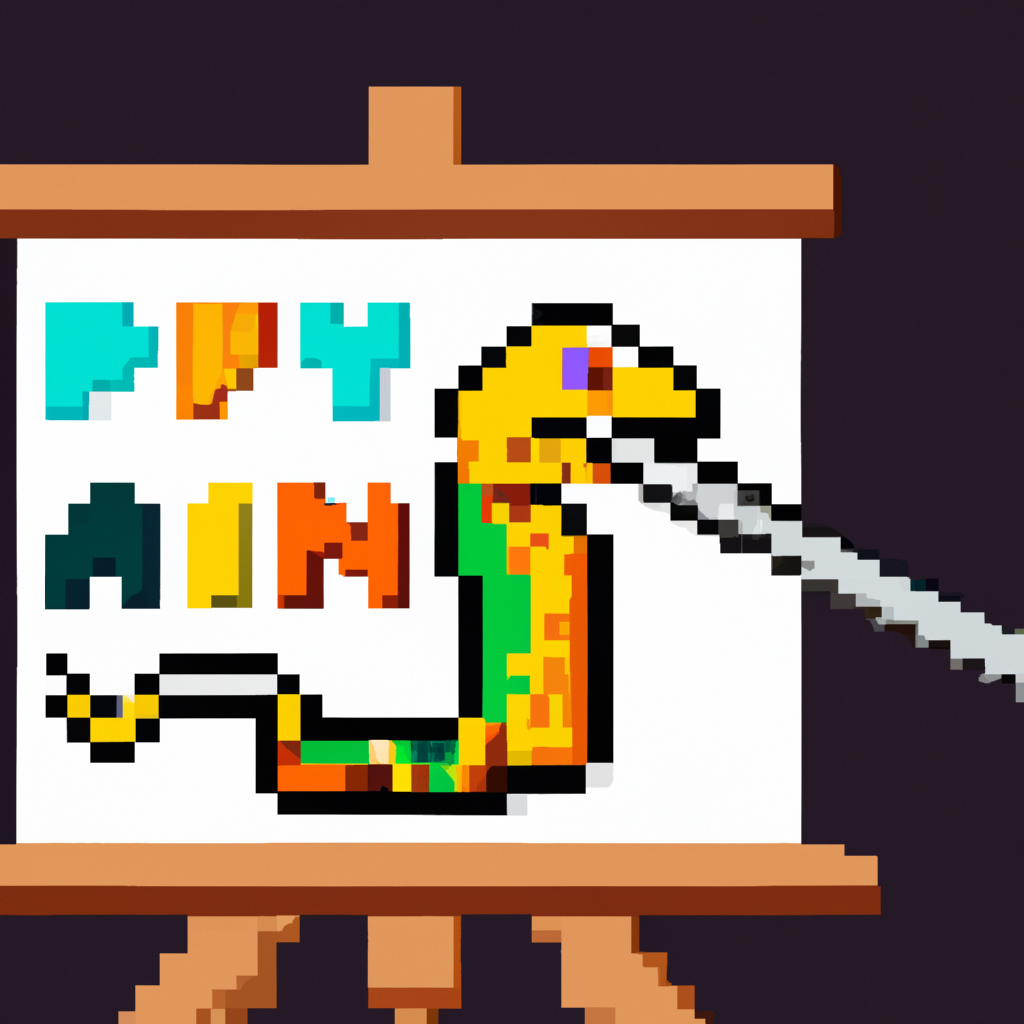

In [ ]:
Image.open('cover.png')

## Create blog

In [ ]:
path_new_content = create_new_blog(title, blog_content, 'cover.png')
write_index(path_new_content)
update_blog('Added new blog')

Blog created
